# 🚢 Day 2: Titanic - Survival Prediction

📌 **Goal**  
Build a machine learning model that can predict whether a passenger survived the Titanic disaster based on passenger data such as age, gender, ticket class, and more.

In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [3]:
# Load the Titanic training dataset
df = pd.read_csv('train.csv')

# View the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

# Shape of the dataset (number of rows and columns)
print("\nShape of dataset (rows, columns):")
print(df.shape)

# Information about data types and missing values
print("\nInfo about dataset columns:")
print(df.info())

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Statistical summary of numeric columns
print("\nStatistical summary:")
print(df.describe())


First 5 rows of the dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450

In [4]:
# Check missing values in the dataset
print("Missing values in each column before cleaning:")
print(df.isnull().sum())

# Drop columns that are mostly empty or less useful
df = df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'])

# Fill missing values
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical columns 'Sex' and 'Embarked' to numeric
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Verify the cleaned dataset
print("\nDataset after cleaning:")
print(df.head())
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values in each column before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Dataset after cleaning:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2

Missing values after cleaning:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


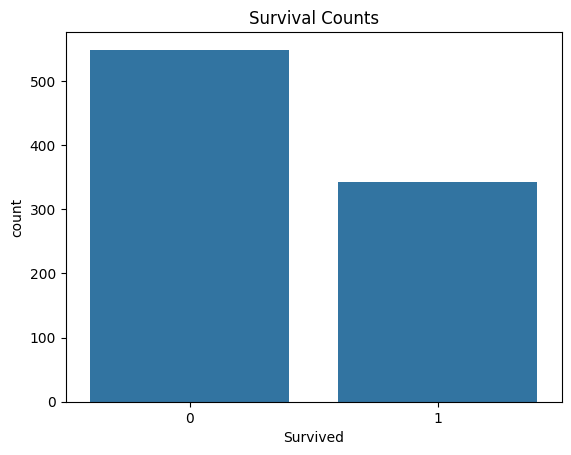

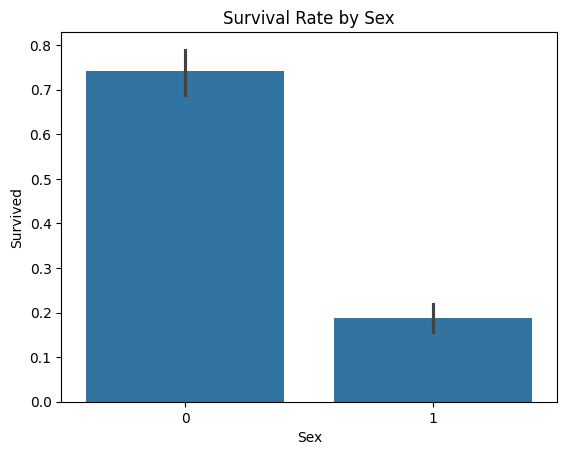

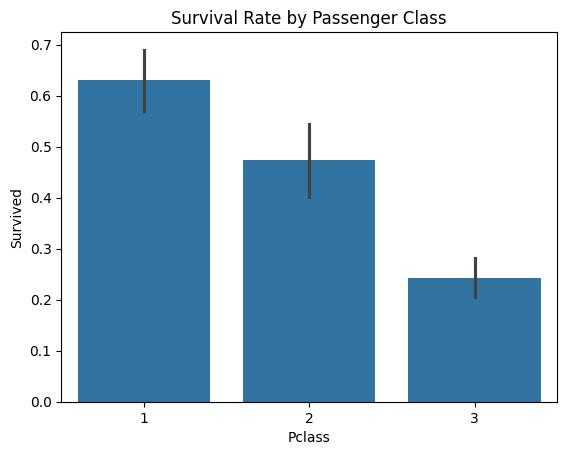

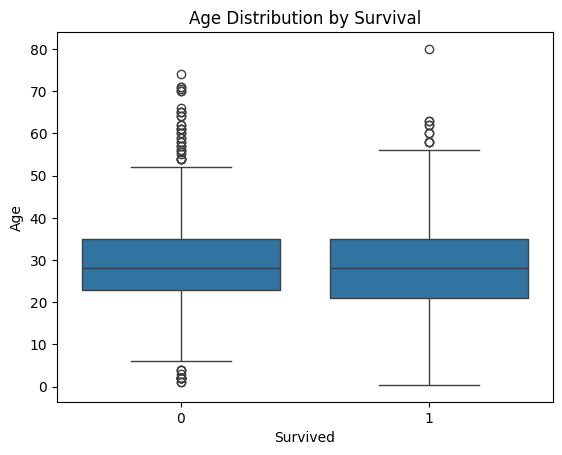

In [5]:
# Visualize survival counts (target variable)
sns.countplot(x='Survived', data=df)
plt.title('Survival Counts')
plt.show()

# Visualize survival rate by Sex
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Visualize survival rate by Pclass (passenger class)
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

# Visualize Age distribution by Survival
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

In [7]:
# Step 4: Prepare features and target variable
X = df.drop(columns=['Survived'])  # Features
y = df['Survived']                 # Target (what we want to predict)

# Step 5: Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 8: Evaluate model performance
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Confusion Matrix:
[[90 15]
 [19 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

